<a href="https://colab.research.google.com/github/bintangsholu21/Pembelajaran-Mesin/blob/main/Modul%203%20-%20Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Job Sheet 3: Regresi**

### Pembelajaran Mesin

* Nama : Muhammad Bintang Sholu Firmansyah
* Kelas : TI - 3G
* NIM : 2141720101
* No Absen : 16

***Github Link https://github.com/bintangsholu21/Pembelajaran-Mesin***

---

### **Praktikum 1**

* Langkah 1: Persiapan Data

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.



```
dataset.csv
```



* Langkah 2: Import Library

In [ ]:
# import package
import numpy as np
import pandas as pd

* Langkah 3: Baca Data

In [ ]:
# baca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/dataset.csv')

* Langkah 4: Pemahaman Terhadap Data

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


* Langkah 5: Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


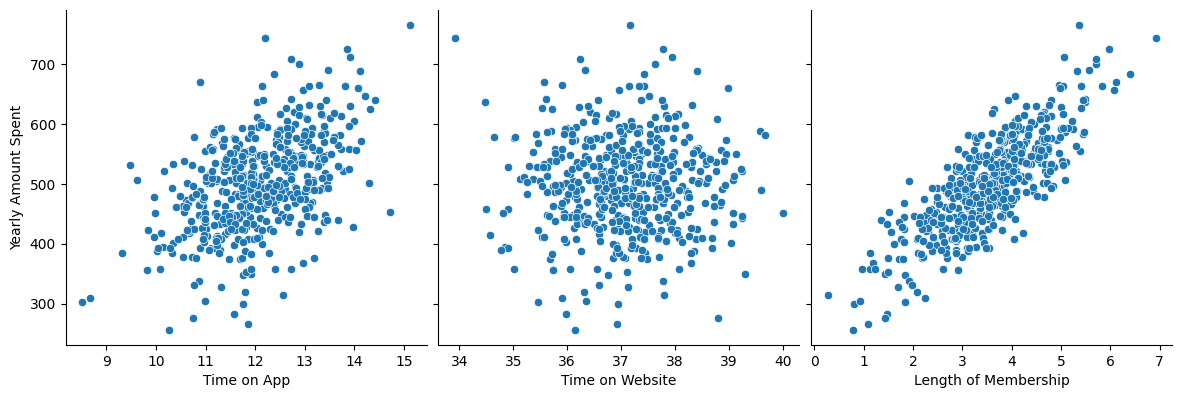

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

<ipython-input-9-9f46fa45ac4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


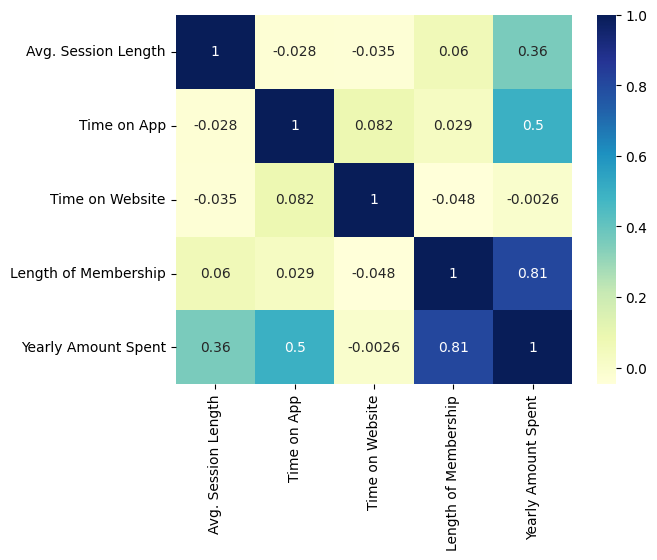

In [ ]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

* Langkah 6: Regresi Linier

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

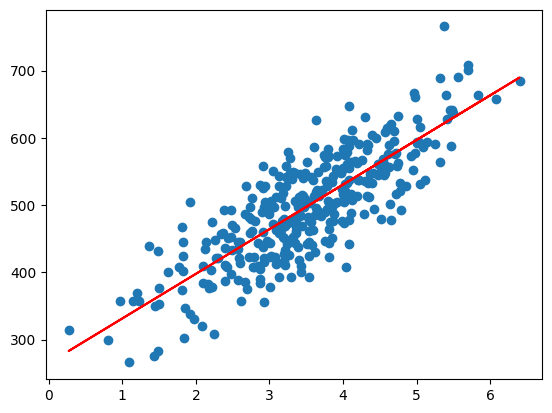

In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

* Langkah 7: Analisis Residual

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

<ipython-input-15-d336bf8b039e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


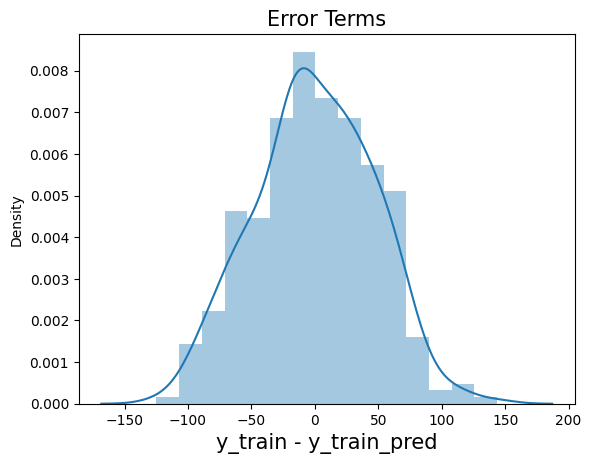

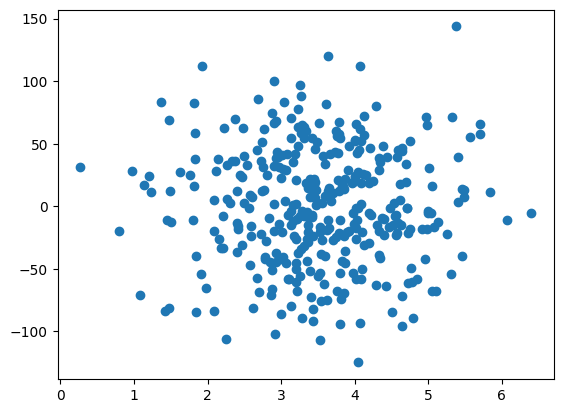

In [ ]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

* Langkah 8: Prediksi pada Data Uji dan Evaluasi Model

In [ ]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

* Langkah 9: Visualisasi Hasil

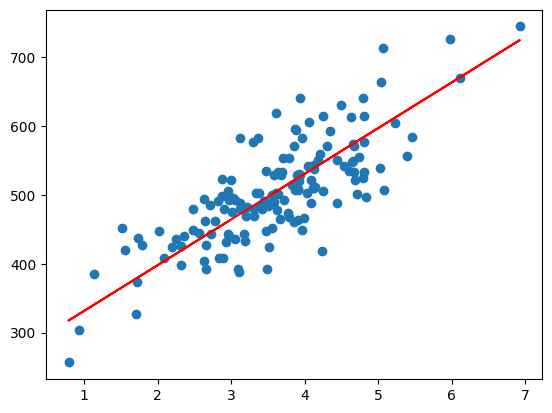

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

---
### **Praktikum 2**

* Mengimpor Library

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Mengimpor Dataset

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

* Feature Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

* Fitting SVR ke Dataset

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

* Visualisasi Hasil SVR

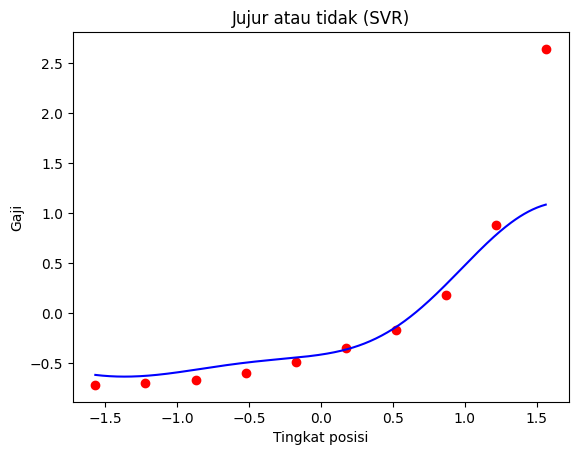

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

* Prediksi Hasil

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

* Menampilkan Hasil

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


* Validasi Hasil

* Evaluasi Model SVR

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


---

## **Tugas Praktikum**

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**
1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.



```
insurance.csv
```

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**

* Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
* Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
* Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

**Pengumpulan Tugas**

Tugas praktikum ini dikumpulkan dalam bentuk laporan berformat dokumen (.doc) dan kode program Python yang digunakan (dalam format .py atau .ipynb). Tugas dikumpulkan ke dosen pengampu sesuai dengan jadwal yang telah ditentukan.

Selamat mengerjakan tugas praktikum! Jika Anda mengalami kesulitan, jangan ragu untuk berkonsultasi dengan dosen pengampu



1. Import Library & data

In [1]:
# import package
import numpy as np
import pandas as pd

# baca data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## **Tugas 1: Multiple Linear Regression**

#### **1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

Variabel Bebas (Fitur)

1. Usia (Age): Usia mempengaruhi biaya medis karena biaya perawatan cenderung meningkat seiring bertambahnya usia.

2. Jenis Kelamin (Sex): Jenis kelamin adalah fitur, meskipun pengaruhnya mungkin tidak sebesar faktor-faktor lainnya.

3. Indeks Massa Tubuh (BMI): BMI mencerminkan komposisi tubuh seseorang.

4. Jumlah Anak (Children): Jumlah anak dalam keluarga dapat memengaruhi biaya medis.

5. Status Perokok (Smoker): Status perokok memengaruhi biaya medis.

6. Wilayah Geografis (Region): Lokasi geografis juga bisa memengaruhi biaya medis.

Variabel Target

1. Biaya Medis Personal (Charges): Variabel yang ingin dianalisis.

In [2]:
# Identifikasi variabel bebas (fitur) dan variabel target:
# - Ukuran dari data
data.shape

#  - Info data
data.info()

# - Deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* data.shape: Perintah ini mengungkapkan dimensi DataFrame data, yaitu jumlah baris dan kolom, memberikan informasi tentang ukuran data.

* data.info(): Ini memberikan data tambahan tentang dataset, termasuk tipe data, jumlah nilai non-null, dan penggunaan memori, yang berguna untuk mendeteksi nilai yang hilang dalam dataset.

* data.describe(): Perintah ini menyajikan statistik deskriptif untuk setiap kolom numerik dalam dataset, seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum, memberikan gambaran awal tentang sebaran data.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


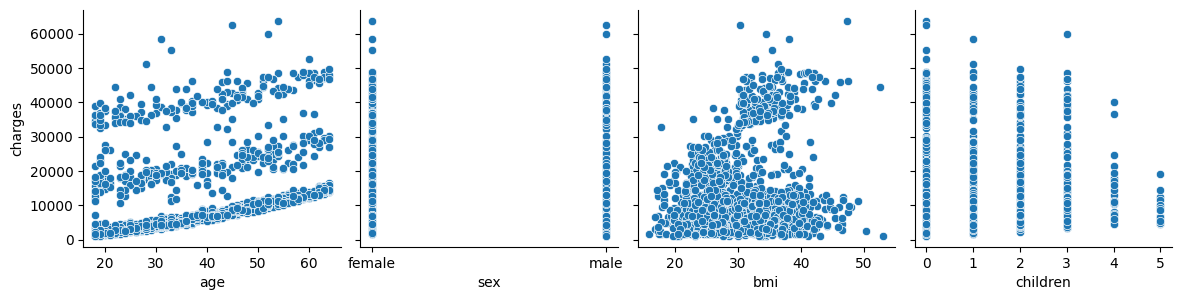

In [3]:
# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(data, x_vars=['age', 'sex', 'bmi','children'],
             y_vars='charges', size=3, aspect=1, kind='scatter')
plt.show()

Penjelasan :

```
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children'],
            y_vars='charges', size=3, aspect=1, kind='scatter')
```

Ini adalah perintah untuk membuat scatter plot (diagram titik) dari hubungan antara variabel independen ('age', 'sex', 'bmi', 'children') dan variabel target 'charges'. Hasilnya akan menunjukkan sejauh mana variabel independen memengaruhi variabel target. size, aspect, dan kind adalah argumen tambahan yang digunakan untuk mengatur tampilan plot.



#### **2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Proses data contoh smoker
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Memilih variabel independen dan variabel target
X = data[['age', 'bmi', 'children', 'smoker']]
y = data['charges']

# Memisahkan data set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Penjelasan :

Kode tersebut mengimpor kelas LinearRegression dan beberapa metrik evaluasi dari pustaka Scikit-Learn untuk membangun dan mengukur model regresi linear. Selain itu, kode mengubah variabel 'smoker' menjadi nilai biner (1 untuk 'yes' dan 0 untuk 'no') karena model regresi linear memerlukan input numerik. Kemudian, kode memilih variabel independen (usia, BMI, jumlah anak, dan status perokok) dan variabel target (biaya asuransi) dari dataset. Selanjutnya, data dibagi menjadi set pelatihan dan pengujian, dengan 20% data digunakan untuk pengujian, dan pengujian yang konsisten diperoleh dengan argumen random_state. Set pelatihan akan digunakan untuk melatih model, sedangkan set pengujian akan digunakan untuk menguji kinerja model.

#### **3. Lakukan feature scaling jika diperkukan.**

Scaling data numerik menggunakan StandardScaler dari Scikit-Learn preprocessing biasanya diperlukan dalam analisis regresi. Dalam dataset asuransi ini, kita akan melakukan scaling pada variabel fitur (X) dan variabel target (y), meskipun dataset ini mungkin tidak menggunakan nama X atau y secara khusus.

#### **4. Buat model multiple linear regression menggunakan Scikit-Learn.**

In [6]:
# Membuat dan melatih model regresi linier berganda
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Penjelasan :    

Kode di atas digunakan untuk membuat dan melatih model regresi linear berganda. Pertama, kita inisialisasi model regresi linear dengan `model = LinearRegression()`. Kemudian, kita melatih model ini menggunakan data pelatihan yang telah disiapkan sebelumnya, yaitu `X_train` sebagai fitur dan `y_train` sebagai target dengan perintah `model.fit(X_train, y_train)`. Ini berarti model akan belajar bagaimana fitur-fitur yang ada dalam `X_train` memengaruhi target yang ada dalam `y_train`, sehingga dapat digunakan untuk membuat prediksi berdasarkan fitur-fitur baru di masa depan.

#### **5. Latih model pada data latih dan lakukan prediksi pada data uji.**

In [7]:
# Buatlah prediksi pada set tes
y_pred = model.predict(X_test)

Penjelasan :    

Prediksi dibuat pada set pengujian dengan menggunakan perintah `model.predict(X_test)`. Hasil prediksi ini akan berisi nilai-nilai yang diperkirakan oleh model untuk variabel target (biasanya disimpan dalam variabel `y_pred`) berdasarkan fitur-fitur yang ada dalam set pengujian (`X_test`). Dengan kata lain, kode ini memperkirakan nilai target untuk data baru yang belum pernah dilihat oleh model sebelumnya.

#### **6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

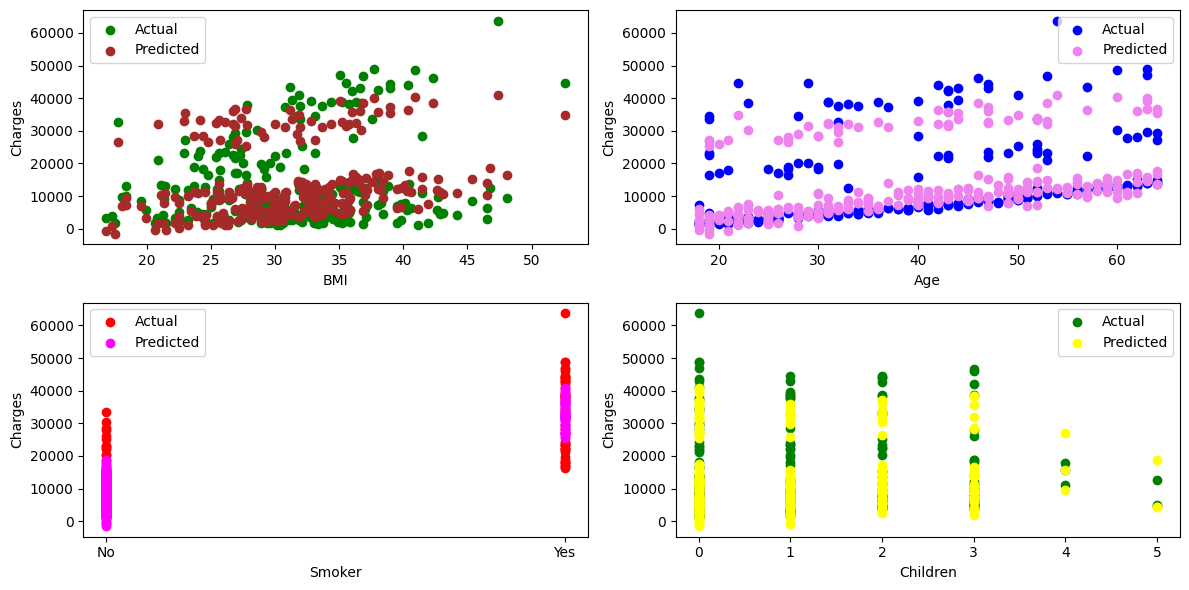

Mean Squared Error (MSE): 33981653.95019776
R-squared: 0.7811147722517886
Mean Absolute Error (MAE): 4213.798594527248


In [12]:
# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Sebar plot untuk 'bmi' vs. 'biaya'
plt.subplot(2, 2, 1)
plt.scatter(X_test['bmi'], y_test, color='green', label='Actual')
plt.scatter(X_test['bmi'], y_pred, color='brown', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'usia' vs. 'biaya'
plt.subplot(2, 2, 2)
plt.scatter(X_test['age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['age'], y_pred, color='violet', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'smoker' vs. 'charges'
plt.subplot(2, 2, 3)
plt.scatter(X_test['smoker'], y_test, color='red', label='Actual')
plt.scatter(X_test['smoker'], y_pred, color='magenta', label='Predicted')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()

# Sebar plot untuk 'children' vs. 'charges'
plt.subplot(2, 2, 4)
plt.scatter(X_test['children'], y_test, color='green', label='Actual')
plt.scatter(X_test['children'], y_pred, color='yellow', label='Predicted')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.legend()

# Tampilkan semua plot
plt.tight_layout()
plt.show()
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Kode di atas berfungsi untuk mengevaluasi kinerja model regresi linear dan memvisualisasikan hasilnya. Ini dilakukan dalam beberapa langkah:

1. Evaluasi Kinerja Model:
   - `mse = mean_squared_error(y_test, y_pred)`: Menghitung Mean Squared Error (MSE) antara nilai sebenarnya (`y_test`) dan prediksi model (`y_pred`), yang mengukur seberapa dekat prediksi dengan nilai sebenarnya.
   - `r2 = r2_score(y_test, y_pred)`: Menghitung nilai R-squared (R^2) atau koefisien determinasi, yang mengukur seberapa baik model memahami variasi dalam data.
   - `mae = mean_absolute_error(y_test, y_pred)`: Menghitung Mean Absolute Error (MAE), yang merupakan rata-rata dari selisih absolut antara nilai sebenarnya dan prediksi.

2. Visualisasi Hasil:
   - Kode ini membuat subplot dengan empat diagram sebar (scatter plot) yang membandingkan beberapa fitur (usia, BMI, jumlah anak, dan status perokok) terhadap variabel target (biaya medis) baik yang sebenarnya (warna biru/green) maupun yang diprediksi oleh model (warna violet/brown/yellow/magenta).
   - Setiap subplot memiliki label sumbu x (fitur) dan sumbu y (biaya medis), serta legenda yang membedakan data sebenarnya dan prediksi.
   - Subplot terakhir menunjukkan variabel 'smoker' yang hanya memiliki dua nilai (No dan Yes), ditandai dengan label sumbu x yang sesuai.
   
3. Menampilkan Plot:
   - `plt.tight_layout()` digunakan untuk mengatur tata letak plot agar rapi.
   - `plt.show()` untuk menampilkan semua plot ke layar.

4. Menampilkan Hasil Evaluasi:
   - Hasil evaluasi model (MSE, R-squared, MAE) ditampilkan di bawah plot untuk memberikan informasi tentang kinerja model dalam mengestimasi biaya medis berdasarkan fitur-fitur yang ada dalam data.